In [2]:
# import...

import xarray as xr
import os
import pandas as pd
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
from geopy import distance
import warnings
import scipy.stats as stats

os.chdir("/Users/etmu9498/research/code/scripts")
import helper_fns
import make_plots
os.chdir("/Users/etmu9498/research/code/scripts/in-situ-scripts")
import load_in_situ_data
os.chdir("/Users/etmu9498/research/code/scripts/boundary-layer")
import boundary_layer_scripts


In [3]:
# find height corrected crl data for this case!
tcname = 'sam'
dataset = 5

# newh, T_2d, power_2d = boundary_layer_scripts.height_correction_all_data( tcname, dataset)

newh, T_2d, wv_2d, pressure = boundary_layer_scripts.find_pressure( tcname, dataset, height_correction=True)
pressure2 = boundary_layer_scripts.find_pressure( tcname, dataset, height_correction=False)

correcting crl heights
temperature interpolated
water vapor interpolated
creating pressure matrix
creating pressure matrix


In [3]:
np.set_printoptions(threshold=np.inf)
# print( newh)
# print( pressure[ 0:5, :])
# print( pressure2[ 0:5, :])
np.set_printoptions(threshold=1000)



C:\Users\etmu9498\research\code\scripts\in-situ-scripts\load_in_situ_data.py:89: PendingDeprecationWarning: dropping variables using `drop` will be deprecated; using drop_vars is encouraged.
  xr_in_situ = xr_in_situ.drop( 'time')
C:\Users\etmu9498\research\code\scripts\in-situ-scripts\load_in_situ_data.py:89: PendingDeprecationWarning: dropping variables using `drop` will be deprecated; using drop_vars is encouraged.
  xr_in_situ = xr_in_situ.drop( 'time')


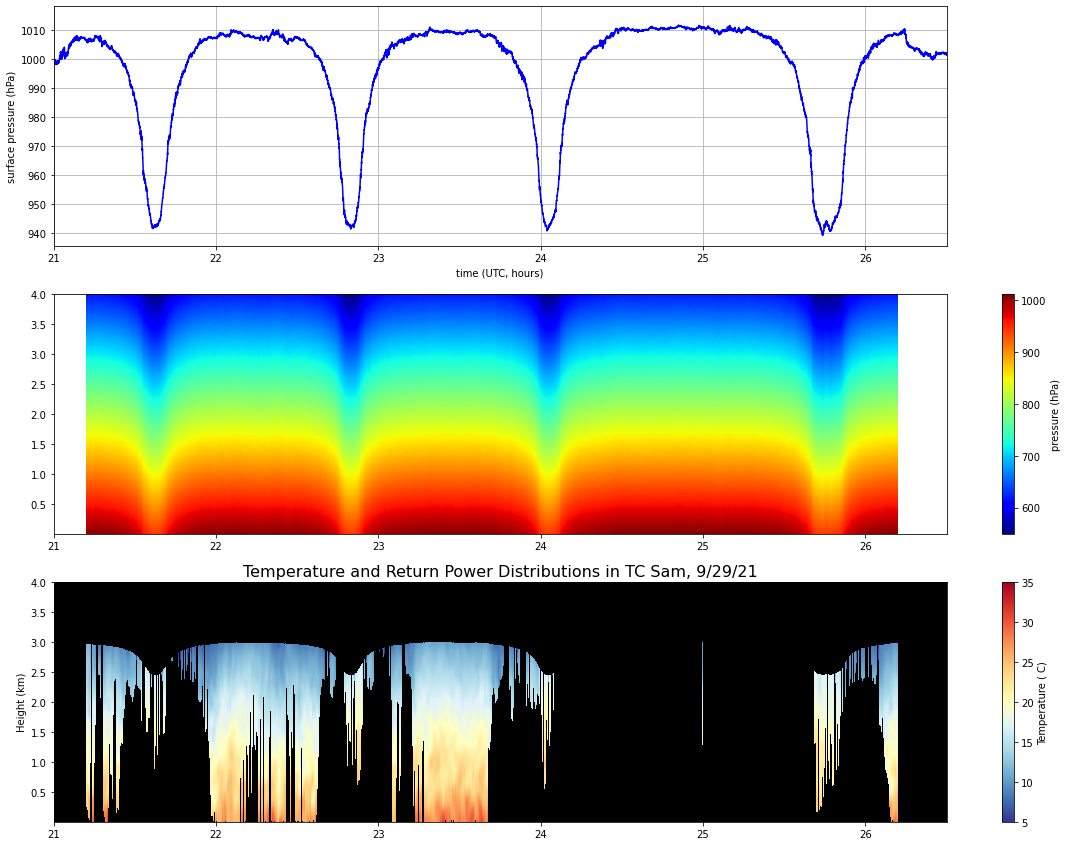

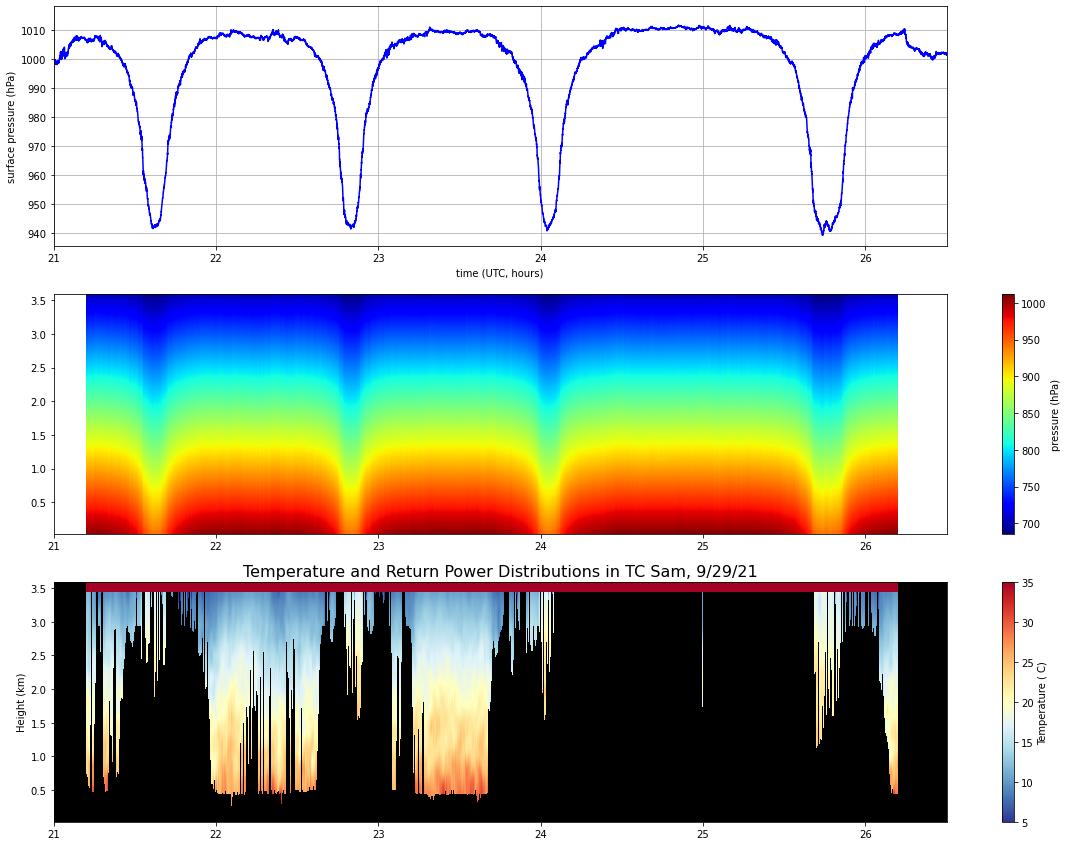

In [4]:
# plot the new pressure field with surface pressures and temperatures!!
# interpolated heights


old_path = "/Users/etmu9498/research/data/in-situ/"
flight_level_list = make_plots.load_flight_level( old_path, print_files=False)
dataset = 34
data = load_in_situ_data.load_in_situ( old_path, flight_level_list[ dataset])
psurf = data['PSURF.d'].values
psurf = [ float( line) for line in psurf]

os.chdir("/Users/etmu9498/research/data/CRL_data/2021")
crl_data = xr.open_dataset( "P3_20210929H2_211201-261159.cdf")


lims = [21, 26.5]

plt.figure( figsize=(20, 15))

plt.subplot(311)
plt.plot( data.time, psurf, c='b')
plt.grid('on')
plt.ylabel('surface pressure (hPa)')
plt.xlabel('time (UTC, hours)')
plt.xlim( lims)
helper_fns.add_blank_colorbar()


plt.subplot(312)
plt.pcolormesh( crl_data.time, - newh, pressure.transpose(), cmap='jet')
plt.colorbar(label='pressure (hPa)')
plt.xlim( lims)

# plot temp data
plt.subplot( 313)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time, - newh, T_2d.transpose(), cmap = color_map, vmin=5, vmax=35 )

plt.title( "Temperature and Return Power Distributions in TC Sam, 9/29/21", fontsize=16)
plt.ylabel( 'Height (km)')

plt.xlim( lims)

ax = plt.gca()
ax.set_facecolor('k')
plt.colorbar(label="Temperature ( C)")



# non interpolated example

old_path = "/Users/etmu9498/research/data/in-situ/"
flight_level_list = make_plots.load_flight_level( old_path, print_files=False)
dataset = 34
data = load_in_situ_data.load_in_situ( old_path, flight_level_list[ dataset])
psurf = data['PSURF.d'].values
psurf = [ float( line) for line in psurf]

os.chdir("/Users/etmu9498/research/data/CRL_data/2021")
crl_data = xr.open_dataset( "P3_20210929H2_211201-261159.cdf")


lims = [21, 26.5]

plt.figure( figsize=(20, 15))

plt.subplot(311)
plt.plot( data.time, psurf, c='b')
plt.grid('on')
plt.ylabel('surface pressure (hPa)')
plt.xlabel('time (UTC, hours)')
plt.xlim( lims)
helper_fns.add_blank_colorbar()


plt.subplot(312)
plt.pcolormesh( crl_data.time, - crl_data.H, pressure2.transpose(), cmap='jet')
plt.colorbar(label='pressure (hPa)')
plt.xlim( lims)

# plot temp data
plt.subplot( 313)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time, - crl_data.H, crl_data.T.transpose(), cmap = color_map, vmin=5, vmax=35 )

plt.title( "Temperature and Return Power Distributions in TC Sam, 9/29/21", fontsize=16)
plt.ylabel( 'Height (km)')

plt.xlim( lims)

ax = plt.gca()
ax.set_facecolor('k')
plt.colorbar(label="Temperature ( C)")


In [6]:
# calculate potential temperature!!! woo!!
p0 = 1000
r_cp = .286
rl = 0

theta = (T_2d + 273.15 ) * ( p0 / pressure)**( r_cp)

thetav = theta * ( 1 + .61 * ( wv_2d / 1000) - rl  )

'\nplt.subplot(212)\ncolor_map = plt.cm.get_cmap( "RdYlBu").reversed()\nplt.pcolormesh( crl_data.time, - newh, thetav.transpose(), cmap = color_map, vmin=295, vmax=330 )\n\nplt.title( "Virtual Potential Temperature Distributions in TC Sam, 9/29/21", fontsize=16)\nplt.ylabel( \'Height (km)\')\n\nplt.xlim( lims)\n\nax = plt.gca()\nax.set_facecolor(\'k\')\nplt.colorbar(label=" Virtual Potential Temperature ( Theta)")\n\n'

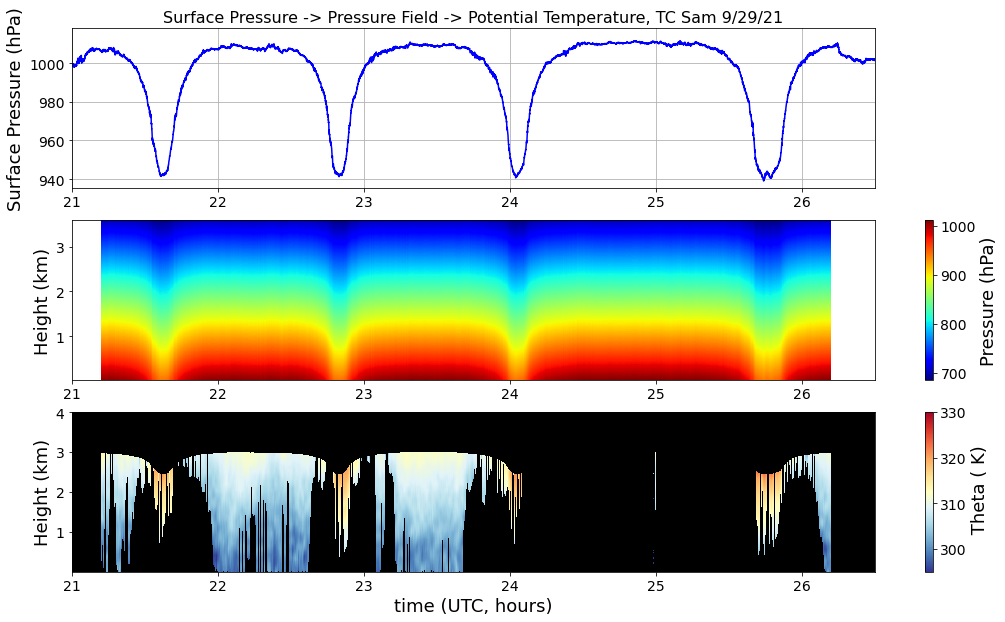

In [11]:
# plot theta!!!!

# plot temp data
plt.figure( figsize=(18, 10))
lims = [21, 26.5]

helper_fns.change_font_sizes()

plt.subplot(313)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time, - newh, theta.transpose(), cmap = color_map, vmin=295, vmax=330 )

plt.ylabel( 'Height (km)')
plt.xlabel('time (UTC, hours)')


plt.xlim( lims)

ax = plt.gca()
ax.set_facecolor('k')
plt.colorbar(label=" Theta ( K)")


plt.subplot(311)
plt.title( "Surface Pressure -> Pressure Field -> Potential Temperature, TC Sam 9/29/21", fontsize=16)
plt.plot( data.time, psurf, c='b')
plt.grid('on')
plt.ylabel('Surface Pressure (hPa)')
plt.xlim( lims)
helper_fns.add_blank_colorbar()


plt.subplot(312)
plt.pcolormesh( crl_data.time, - crl_data.H, pressure2.transpose(), cmap='jet')
plt.colorbar(label='Pressure (hPa)')
plt.ylabel( 'Height (km)')
plt.xlim( lims)


'''
plt.subplot(212)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time, - newh, thetav.transpose(), cmap = color_map, vmin=295, vmax=330 )

plt.title( "Virtual Potential Temperature Distributions in TC Sam, 9/29/21", fontsize=16)
plt.ylabel( 'Height (km)')

plt.xlim( lims)

ax = plt.gca()
ax.set_facecolor('k')
plt.colorbar(label=" Virtual Potential Temperature ( Theta)")

'''

In [2]:
# load flight level data to see if flight level pressure data are included
# look for:
# PCAB.1 Cabin Pressure Sensor 
# PQ.1 Fuselage Corrected Dynamic Static Pressure
# PQ.2 Wingtip Corrected Dynamic Static Pressure
# PQFref (PQF.1) Raw Fuselage Dynamic Pressure, Reference
# **  PQref (PQ.1) Corrected Dynamic Static Pressure, Reference
# PS.1 Corrected Fuselage Static Pressure
# PS.2 Corrected Wingtip Static Pressure
# *** PSURF.1 Extrapolated Seal Level Pressure

path = "/Users/etmu9498/research/data/in-situ-nc/"
old_path = "/Users/etmu9498/research/data/in-situ/"
flight_level_list = make_plots.load_flight_level( old_path, print_files=False)

dataset = 34

data = load_in_situ_data.load_in_situ( old_path, flight_level_list[ dataset])

'''
# manual way, kinda annoying
os.chdir( old_path)
data = pd.read_csv( flight_level_list[ dataset], header=None)

# data = xr.open_dataset( flight_level_list[ dataset])
'''

data


<xarray.Dataset>
Dimensions:            (index: 31192, time: 31192)
Coordinates:
  * index              (index) int64 0 1 2 3 4 ... 31187 31188 31189 31190 31191
  * time               (time) float64 17.83 17.83 17.83 ... 26.51 26.51 26.51
Data variables: (12/136)
    IWG1_NAMES         (index) object 'IWG1' 'IWG1' 'IWG1' ... 'IWG1' 'IWG1'
    TIME               (index) object '20210929T175000' ... '20210930T023029'
    LATref             (index) object '17.7003' '17.7003' ... '20.9175'
    LONref             (index) object '-64.7941' '-64.7941' ... '-60.3688'
    ALTref             (index) object '15.6' '15.6' '15.6' ... '5785.4' '5785.4'
    GPS_GeoidHt.3      (index) object nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    TVIRT.d            (index) object '302.59' '302.59' ... '268.81' '268.77'
    dt                 (index) datetime64[ns] 2021-09-29T17:50:00 ... 2021-09...
    float_time         (index) float64 17.83 17.83 17.83 ... 26.51 26.51 26.51
    str_time           (index) <U8 '17:50:00' '17:50:01' ... '02:30:29'
    rollval            (index) float64 -0.09 -0.09 -0.09 ... 0.12 0.14 0.26
    pitchval           (index) float64 -2.84 -2.84 -2.84 ... 0.37 0.45 0.42

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


(21.0, 26.5)

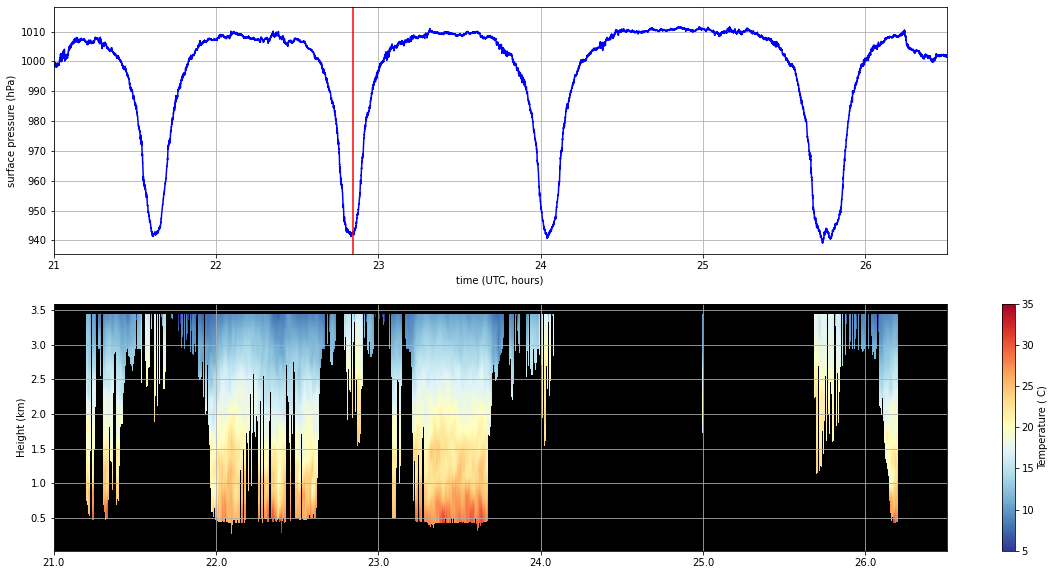

In [3]:
# make an initial surface pressure plot!!!

'''
# testing data types
print( np.shape( data.time))
print( np.shape( data['PSURF.d']))
print( type( data.time))
print( type( data['PSURF.d']))
print( data.time)
print( data['PSURF.d'])
'''

ind = 18000

psurf = data['PSURF.d'].values
psurf = [ float( line) for line in psurf]

# print( psurf)

lims = [21, 26.5]

plt.figure( figsize=(20, 10))

plt.subplot(211)
plt.plot( data.time, psurf, c='b')
plt.grid('on')
plt.ylabel('surface pressure (hPa)')
plt.xlabel('time (UTC, hours)')
plt.xlim( lims)
helper_fns.add_blank_colorbar()

plt.axvline( x=data.time[ind], c='r')

plt.subplot(212)
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path)
crl_name = crl_list[ 18]

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)

make_plots.plot_T( crl_path, crl_name, 0, 9299, 'time')
plt.xlim(lims)

In [5]:
# try to interpolate surface pressures to make a 2D pressure field!

# use a slope of -10.257 m/ hPa derived from dropsondes, and surface pressures to find the y intercept! 
# then, create a line representing

'''
# testing linear fit
pressure = psurf[ ind]
print( pressure)
yint = - ( slope * pressure)
print(yint)
print( np.shape( crl_data.T)[ 1])
'''

# make a new matrix to hold pressure values; the same size as temp
new_matrix=np.empty([ np.size( crl_data.T, 0), np.size( crl_data.T, 1)])
# print( np.shape( new_matrix))

# defining some constants
height_count = np.shape( crl_data.T)[1]
psurf = data['PSURF.d'].values
psurf = [ float( line) for line in psurf]
slope = -10.257

warnings.filterwarnings("ignore")

# do this for every timestep!
for crl_ind in range( np.shape( crl_data.T)[0]):
    
    # find the closest in situ timestep to current crl index
    # find closest crl distances to a 'padding' variable: save their indices and corresponding distances!
    insitu_idx = (np.abs( data.time - crl_data.time[ crl_ind] )).argmin().values

    # get the surface pressure at the closest timestep
    psurfi = psurf[ insitu_idx]

    # make an equation relating pressure to height ( y = 0m here)
    yint = - ( slope * psurfi)
    
    # get current p3 height
    height = float( data['HT.d'][ insitu_idx].values)
    
    
    # find pressure at this height using the equation above!
    ptop = ( height - yint) / slope
    
    # create a vertical pressure profile for this index
    pcolumn = np.linspace( ptop, psurfi, height_count)

    new_matrix[ crl_ind, :] = pcolumn

    # testing... the closest time script looks good!
    # print( crl_data.time[ crl_ind].values)
    # print( data.time[ insitu_idx].values)
    
    
warnings.filterwarnings("default")


np.set_printoptions(threshold=np.inf)
# print( new_matrix[ 0:5, :])
np.set_printoptions(threshold=1000)


(21.0, 26.5)

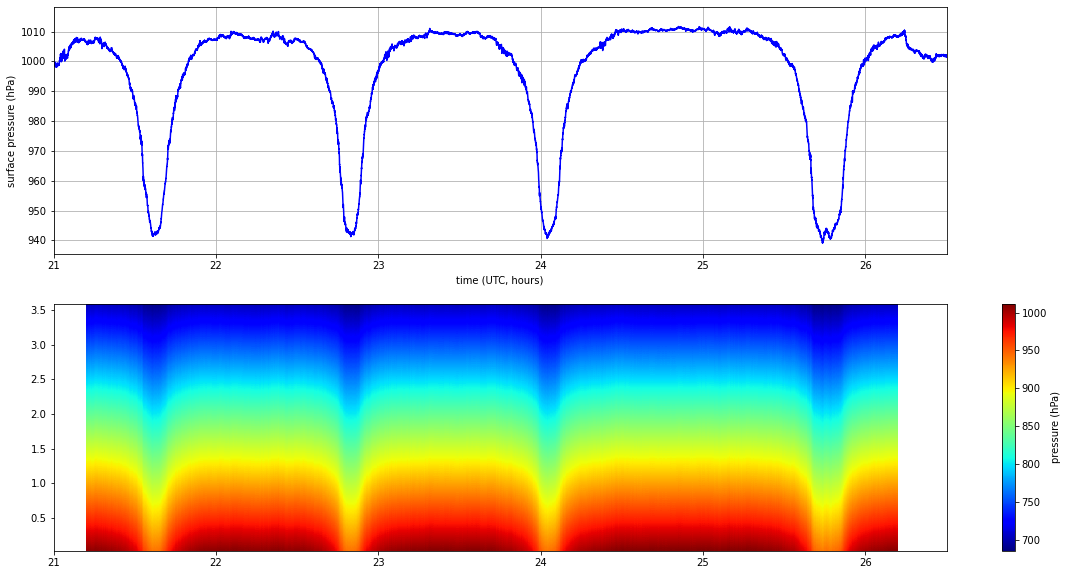

In [7]:
# plot the new pressure field with surface pressures!!


lims = [21, 26.5]

plt.figure( figsize=(20, 10))

plt.subplot(211)
plt.plot( data.time, psurf, c='b')
plt.grid('on')
plt.ylabel('surface pressure (hPa)')
plt.xlabel('time (UTC, hours)')
plt.xlim( lims)
helper_fns.add_blank_colorbar()


plt.subplot(212)
plt.pcolormesh( crl_data.time, - crl_data.H, new_matrix.transpose(), cmap='jet')
plt.colorbar(label='pressure (hPa)')
plt.xlim( lims)